In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import pandas as pd
airline_data = pd.read_excel('C:\kirti, sheet_name='data')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airline_data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline_data.set_index('ID',inplace=True)
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [24]:
airline_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [12]:
print('unique_cc1',airline_data.cc1_miles.unique())
print('unique_cc2',airline_data.cc2_miles.unique())
print('unique_cc3',airline_data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [13]:
airline_data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

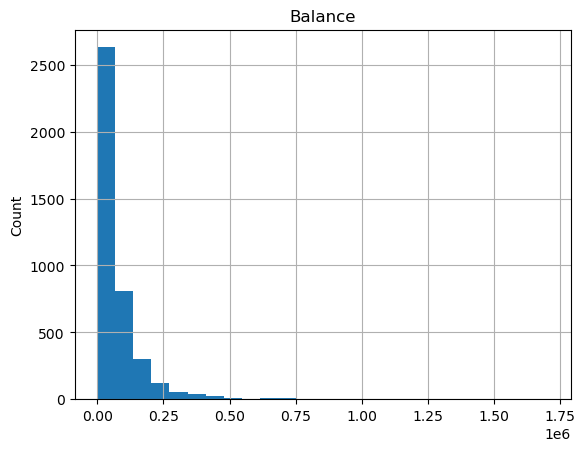

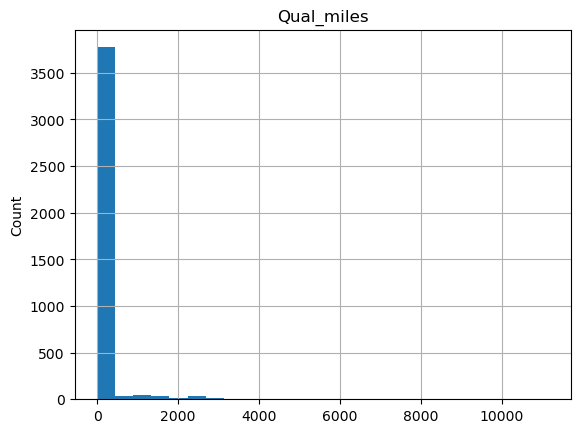

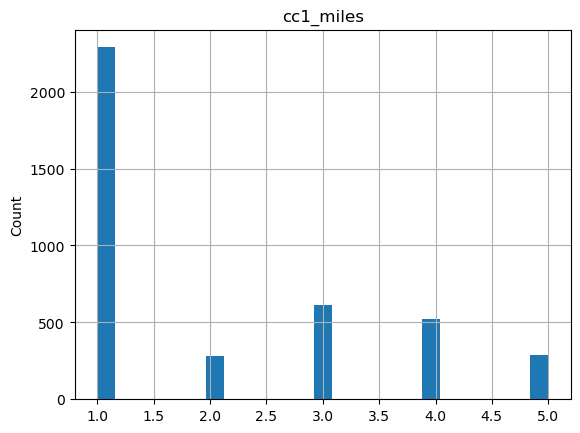

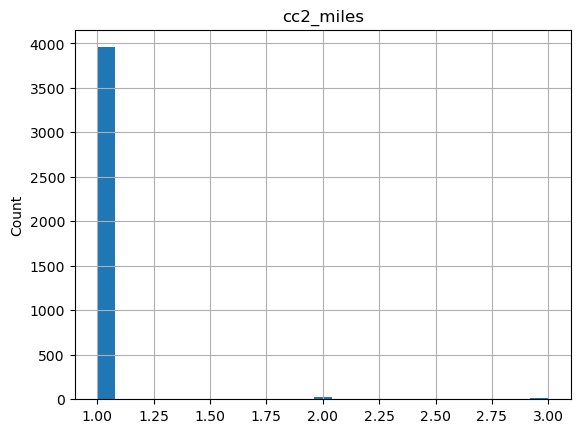

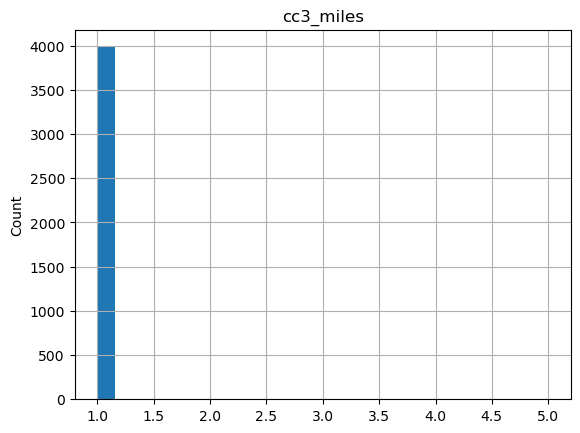

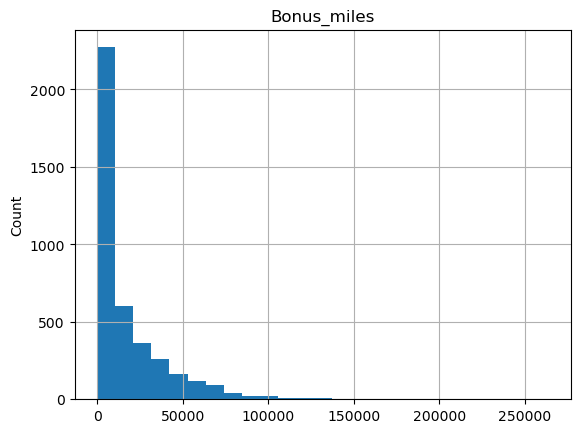

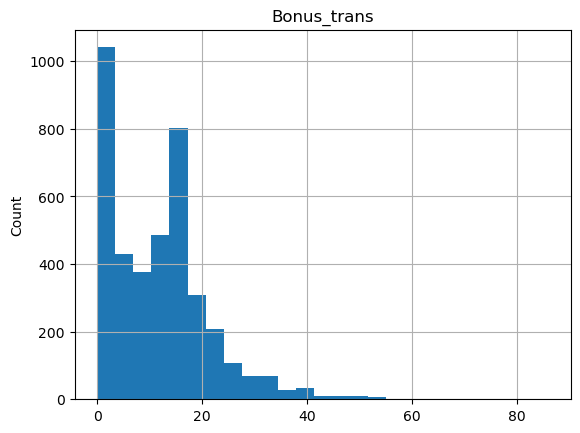

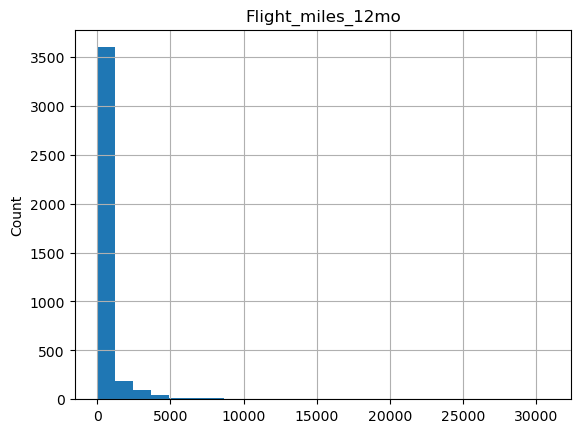

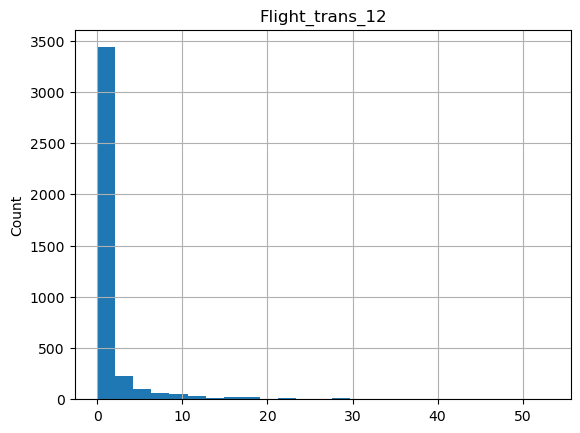

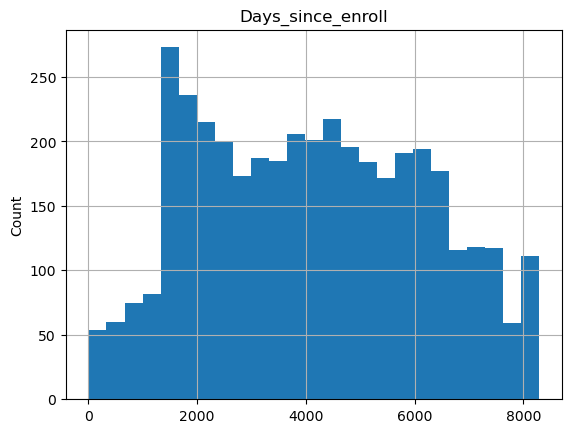

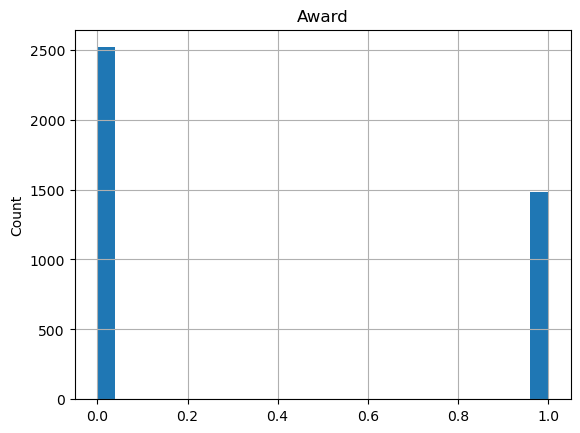

In [14]:
for feature in airline_data.columns:
    airline_data1 = airline_data.copy()
    airline_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [15]:
airline_data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

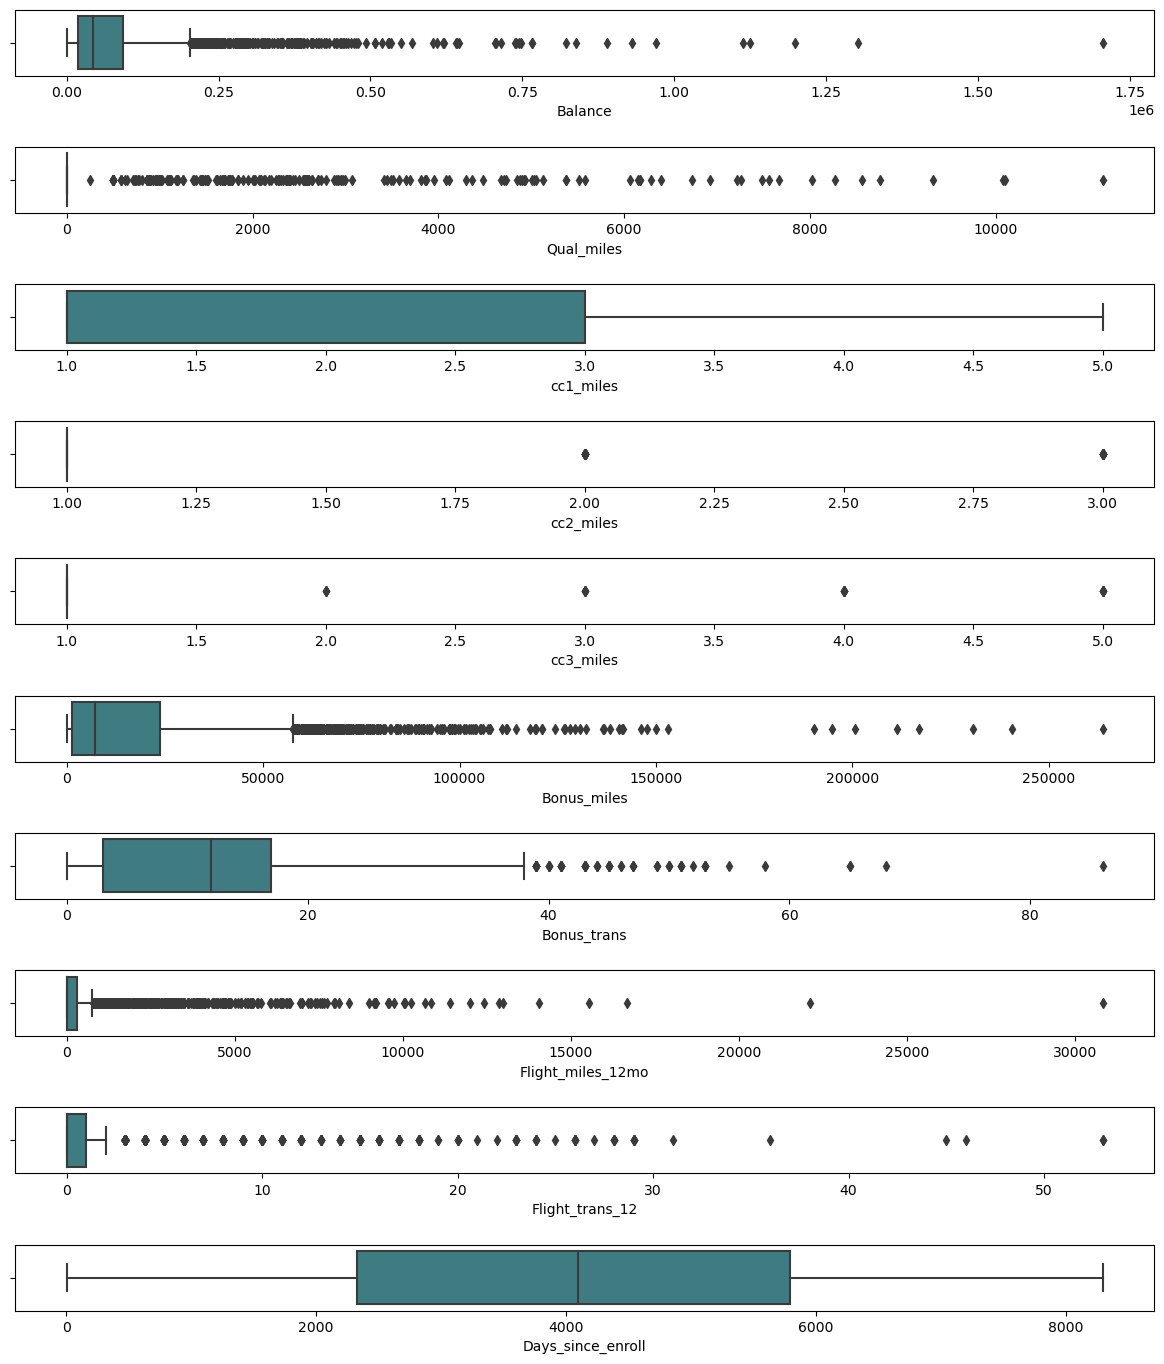

In [16]:
outlier = airline_data.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [17]:
countNotermdeposit = len(airline_data[airline_data.Award == 0])
countHavetermdeposit = len(airline_data[airline_data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(airline_data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(airline_data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


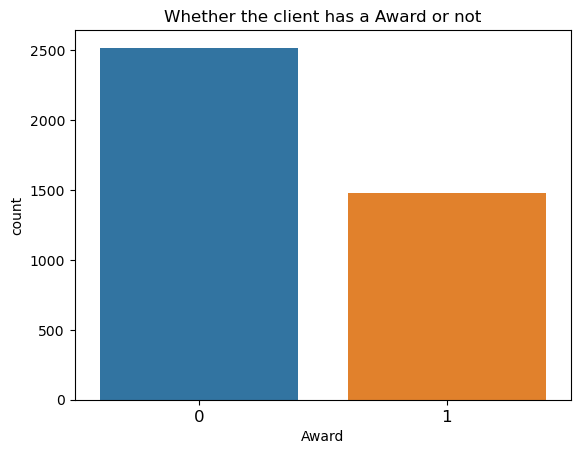

In [18]:
sns.countplot(x='Award', data= airline_data, order= airline_data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

In [19]:
corr_matrix = airline_data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

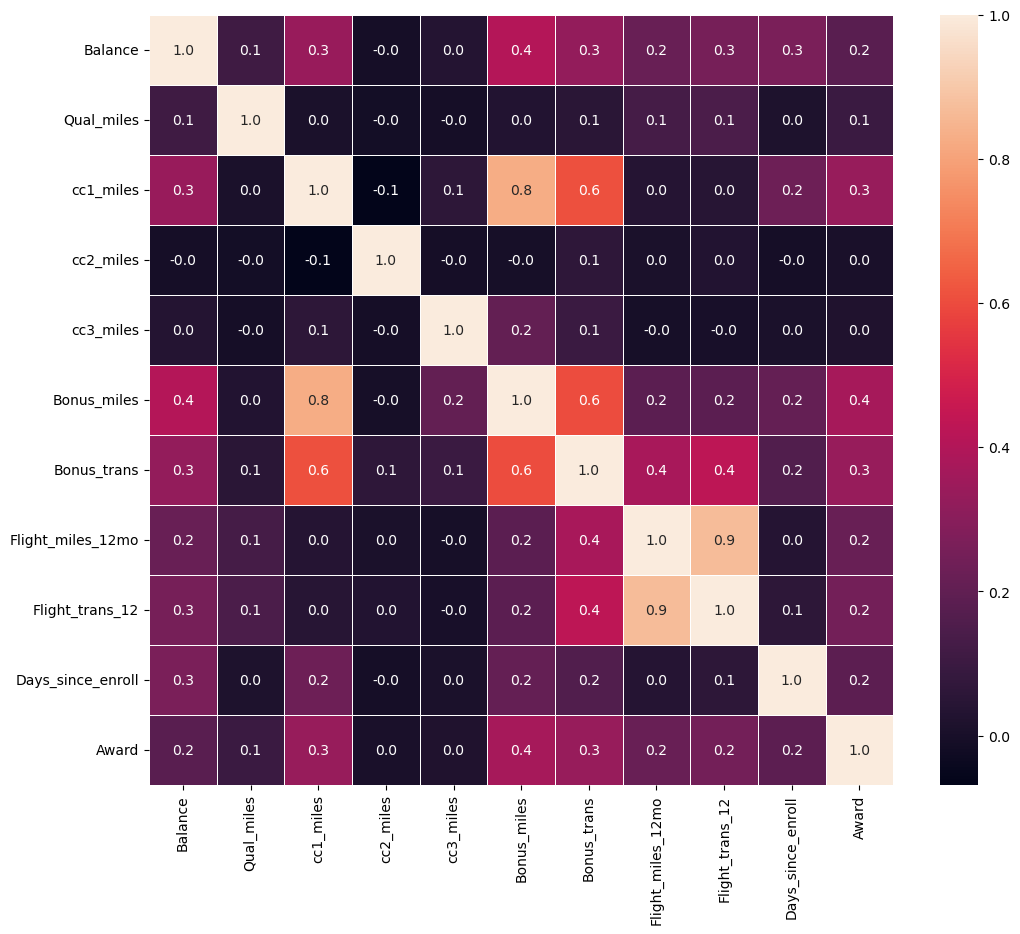

In [20]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(airline_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

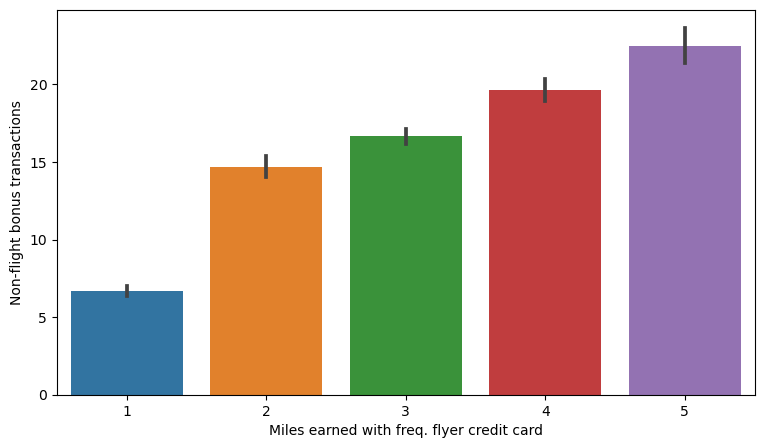

In [21]:
plt.figure(figsize = (9,5))
sorted_data = airline_data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

In [25]:
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(airline_data)
std_airline.shape

(3999, 12)

In [26]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airline_data)
norm_airline.shape

(3999, 12)

    Num_Clusters  Cluster_Errors
0              1    47988.000000
1              2    39018.779534
2              3    34531.090384
3              4    30616.542727
4              5    26894.773114
5              6    23502.839537
6              7    20922.772908
7              8    19329.749509
8              9    18014.578756
9             10    16769.660025
10            11    15776.825516
11            12    14937.194365
12            13    14183.690271
13            14    13580.543287


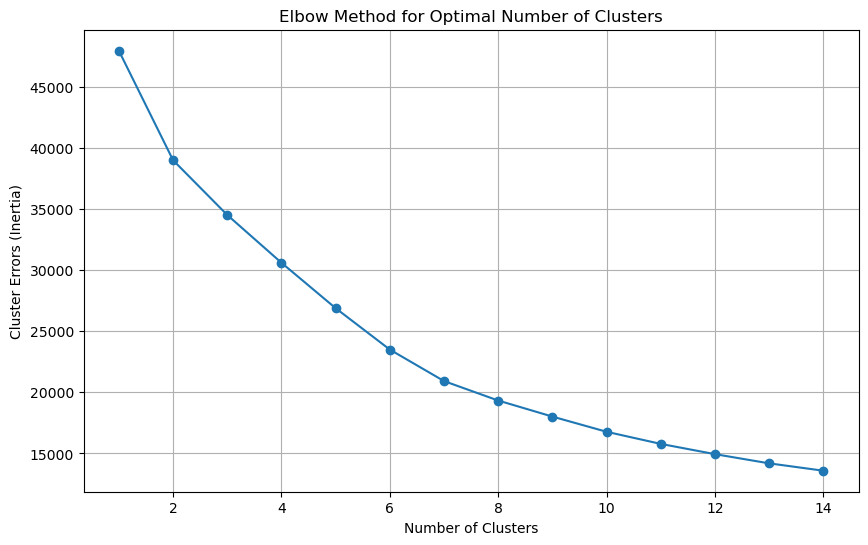

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"Num_Clusters": cluster_range, "Cluster_Errors": cluster_errors})
print(clusters_df)

# Optional: Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_df["Num_Clusters"], clusters_df["Cluster_Errors"], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Errors (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


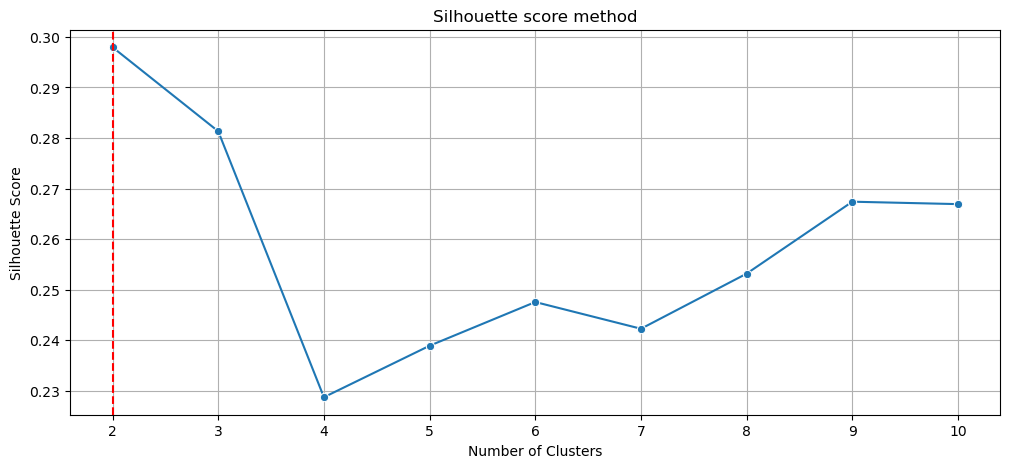

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming std_airline is already defined and preprocessed
# std_airline = ...

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_airline, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


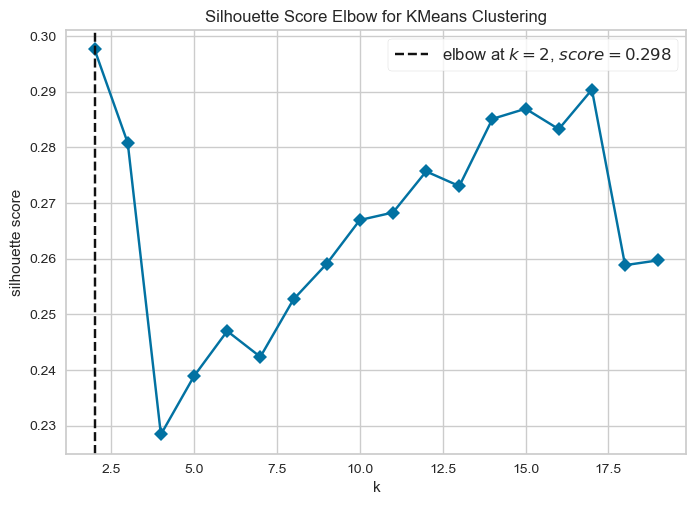

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model. We will check for two different hyperparameter values.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2, 20), metric='silhouette', timings=False)

# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_airline)
visualizer.show()


In [33]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_airline)
    sil_score1= silhouette_score(std_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.29782139660896717
For n_clusters = 3 The average silhouette_score is : 0.2809482836639086
For n_clusters = 4 The average silhouette_score is : 0.22850886232716114
For n_clusters = 5 The average silhouette_score is : 0.23911172767198455
For n_clusters = 6 The average silhouette_score is : 0.24754814537358727
For n_clusters = 7 The average silhouette_score is : 0.2423950921546768
For n_clusters = 8 The average silhouette_score is : 0.2530826508438071
For n_clusters = 9 The average silhouette_score is : 0.26739659667606214


In [34]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)
y_predict_kmeans.shape

(3999,)

In [35]:
# these are nothing but cluster labels...
y_predict_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [36]:
model_kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [37]:
model_kmeans.cluster_centers_

array([[-0.792215  , -0.16310888, -0.05017319, -0.50959763, -0.09824189,
        -0.05874576, -0.47211132, -0.39177122, -0.16556507, -0.17590564,
         0.7709545 , -0.25164813],
       [ 0.96778408, -0.33825322, -0.05983378, -0.50036163, -0.09824189,
        -0.06276658, -0.46126923, -0.4169747 , -0.18829501, -0.20771559,
        -0.95919987, -0.35608291],
       [-0.3942365 ,  0.51305624,  0.02674492,  1.36047962, -0.09824189,
        -0.05275188,  1.1235718 ,  0.79913271, -0.06426603, -0.07066778,
         0.39743527,  0.68853733],
       [ 0.21932485, -0.04688966, -0.1562356 , -0.66822727,  9.03825361,
        -0.06276658, -0.10166533,  0.61785114,  0.0875494 ,  0.22034681,
        -0.07246398,  0.05178388],
       [-0.23852715,  1.18446344,  0.88037642,  0.11446574, -0.09824189,
        -0.06276658,  0.63780138,  1.65423176,  3.64043543,  3.92064625,
         0.275472  ,  0.9224481 ],
       [-0.30152248,  0.63971926, -0.08443292,  1.0220844 , -0.09824189,
        15.64629931,  

In [38]:
model_kmeans.inertia_

23490.753683714258

In [42]:
airline_df = pd.read_excel('/Users/kirtisailinaidu/Downloads/Clustering/EastWestAirlines.xlsx', sheet_name='data')
airline_df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
airline_df['Kmeans_Label'] = model_kmeans.labels_

In [43]:
# Group data by Clusters (K=6)
airline_df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1095.359498,57165.977237,105.302198,1.357928,1.000000,1.000785,5744.326531,7.839874,228.259027,0.706436,5710.485086,0.248823
1,3138.048257,39517.896783,97.829088,1.370643,1.000000,1.000000,6006.140751,7.597855,196.436327,0.585791,2137.930295,0.198391
2,1557.260997,125298.446725,164.803519,3.932551,1.000000,1.001955,44276.799609,19.275660,370.081134,1.105572,4939.214076,0.702835
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1737.980263,192951.493421,825.144737,2.217105,1.000000,1.000000,32546.440789,27.486842,5556.789474,16.243421,4687.375000,0.815789
5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


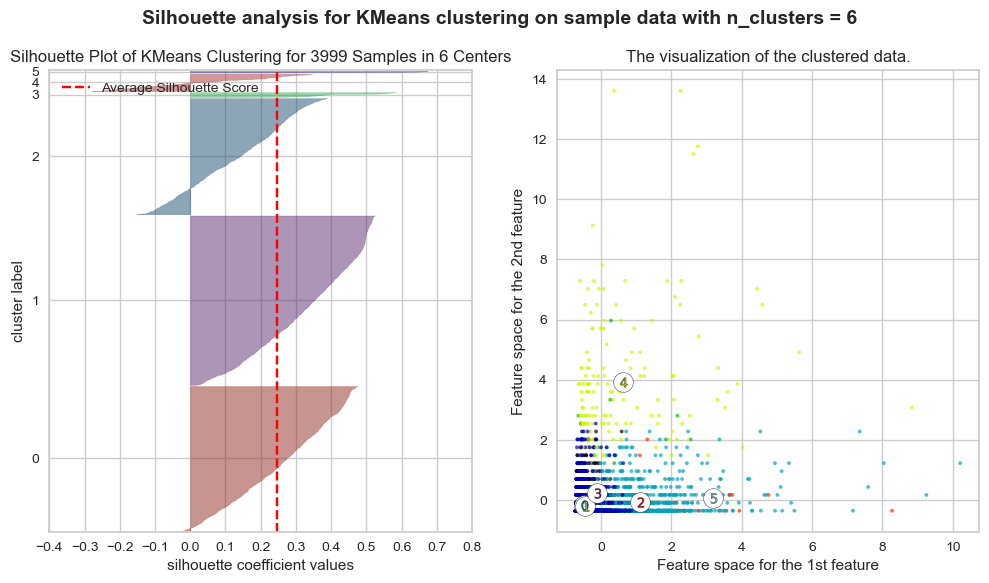

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_airline[:, 6], std_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

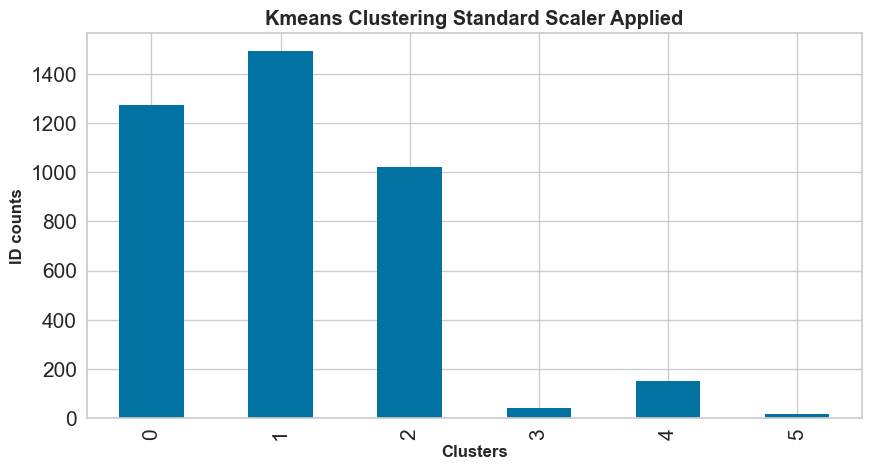

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [46]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,2164.126598
1,2,1146.459517
2,3,865.266158
3,4,673.471219
4,5,536.203479
5,6,452.228431
6,7,397.945659
7,8,346.226852
8,9,308.528165
9,10,289.449334


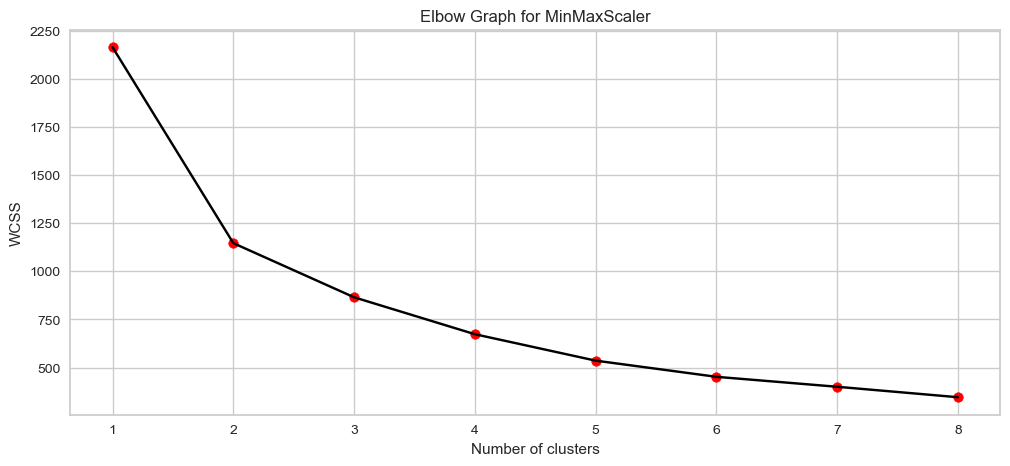

In [47]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airline)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

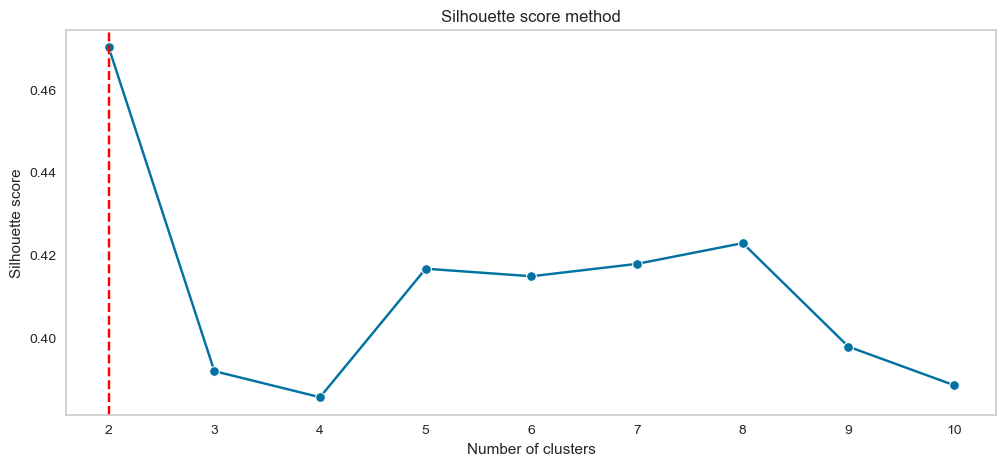

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming norm_airline is already defined and scaled using MinMaxScaler
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(norm_airline)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(norm_airline, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Normalization data


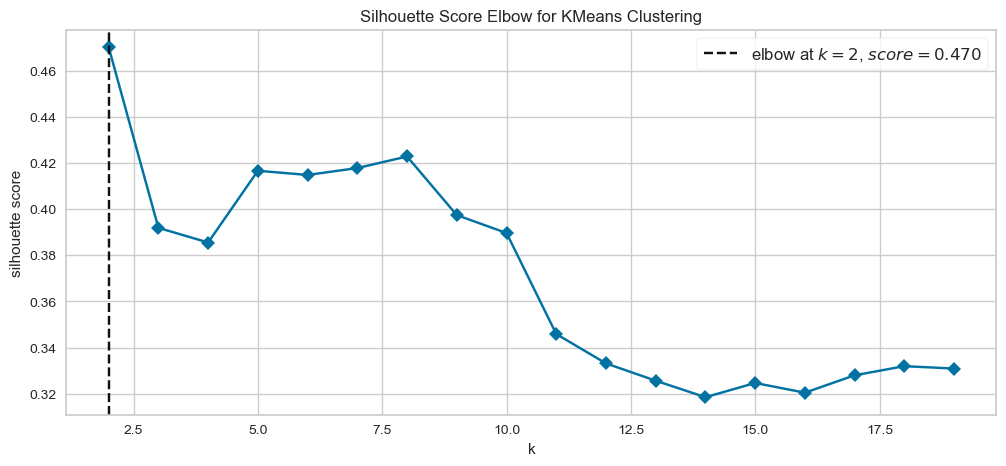

In [50]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
plt.subplots(figsize=(12,5))
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Normalization data')
visualizer.fit(norm_airline)    
visualizer.poof()
plt.show()

In [51]:
clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_airline)
    sil_score1= silhouette_score(norm_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4701970394742716
For n_clusters = 3 The average silhouette_score is : 0.39191617006352614
For n_clusters = 4 The average silhouette_score is : 0.3855615917300375
For n_clusters = 5 The average silhouette_score is : 0.4166386993706997
For n_clusters = 6 The average silhouette_score is : 0.41481379811626945
For n_clusters = 7 The average silhouette_score is : 0.4178458100501951
For n_clusters = 8 The average silhouette_score is : 0.42279094434684605
For n_clusters = 9 The average silhouette_score is : 0.39778586316224257


In [52]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_airline)
y_predict_kmeans.shape

(3999,)

In [53]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [54]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [55]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[ 4.33978319e-01,  5.69280197e-02,  2.15461508e-02,
         4.15428764e-01,  7.76502363e-03,  4.55773126e-03,
         1.09621005e-01,  1.83518364e-01,  2.78255837e-02,
         4.90489598e-02,  5.57398375e-01,  1.00000000e+00],
       [ 5.40340593e-01,  3.50812450e-02,  7.85813260e-03,
         1.76330421e-01,  6.94996029e-03,  2.18427323e-03,
         3.87875269e-02,  1.06313612e-01,  7.34309944e-03,
         1.23113582e-02,  4.60411394e-01, -2.22044605e-16]])

In [56]:
model_kmeans.inertia_

1146.459517093534

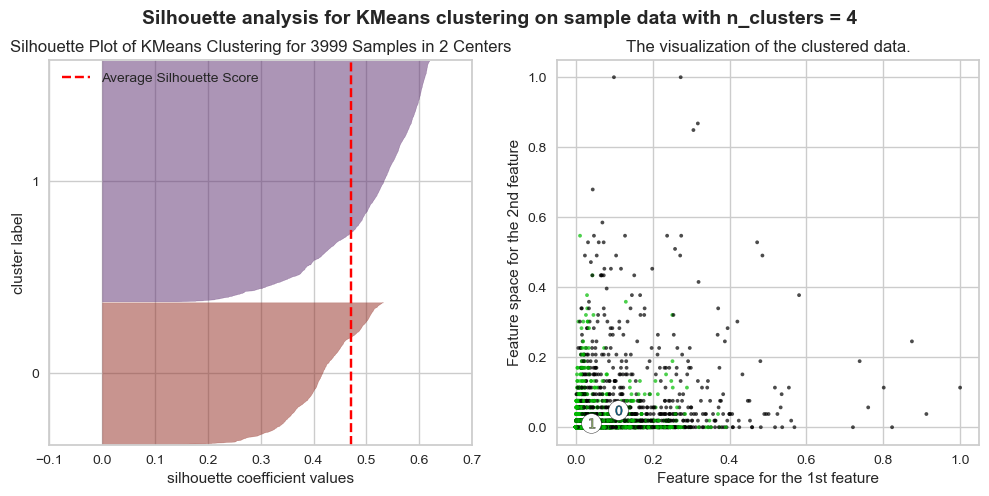

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,5)
sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(norm_airline[:, 6], norm_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

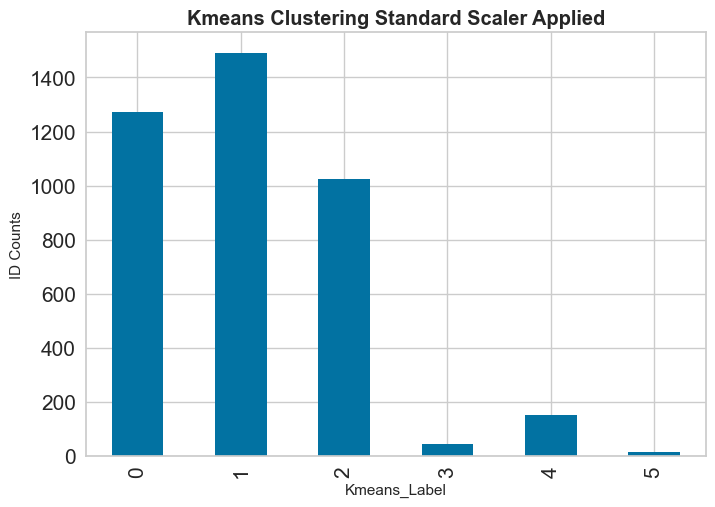

In [58]:
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [59]:
# Group data by Clusters (K=2)
airline_df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1095.359498,57165.977237,105.302198,1.357928,1.000000,1.000785,5744.326531,7.839874,228.259027,0.706436,5710.485086,0.248823
1,3138.048257,39517.896783,97.829088,1.370643,1.000000,1.000000,6006.140751,7.597855,196.436327,0.585791,2137.930295,0.198391
2,1557.260997,125298.446725,164.803519,3.932551,1.000000,1.001955,44276.799609,19.275660,370.081134,1.105572,4939.214076,0.702835
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1737.980263,192951.493421,825.144737,2.217105,1.000000,1.000000,32546.440789,27.486842,5556.789474,16.243421,4687.375000,0.815789
5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


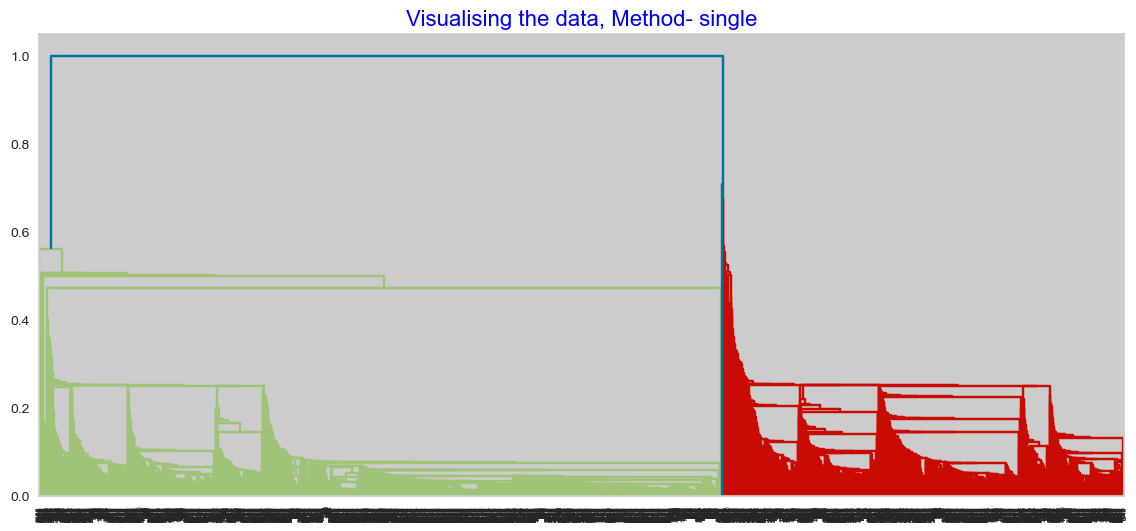

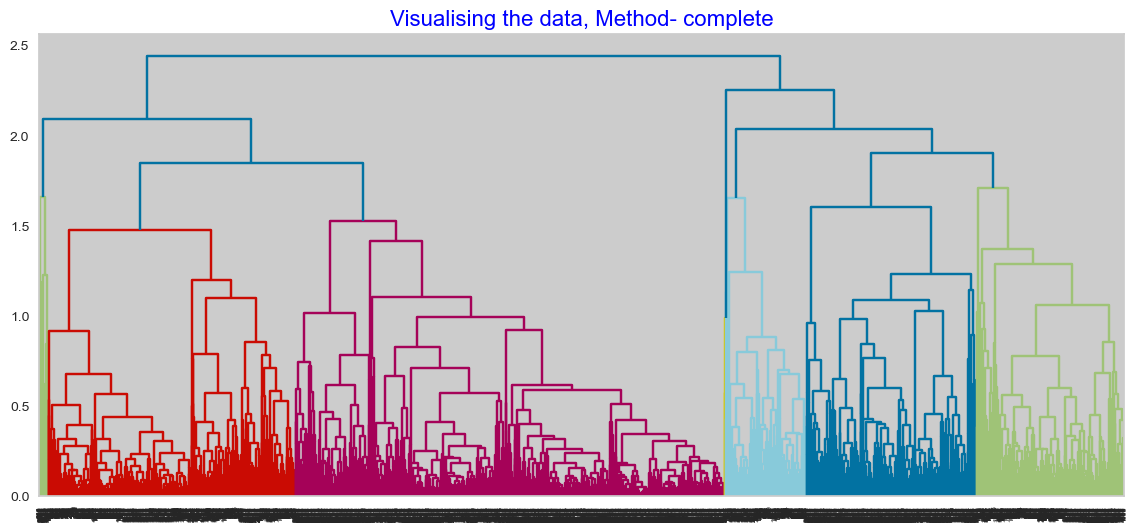

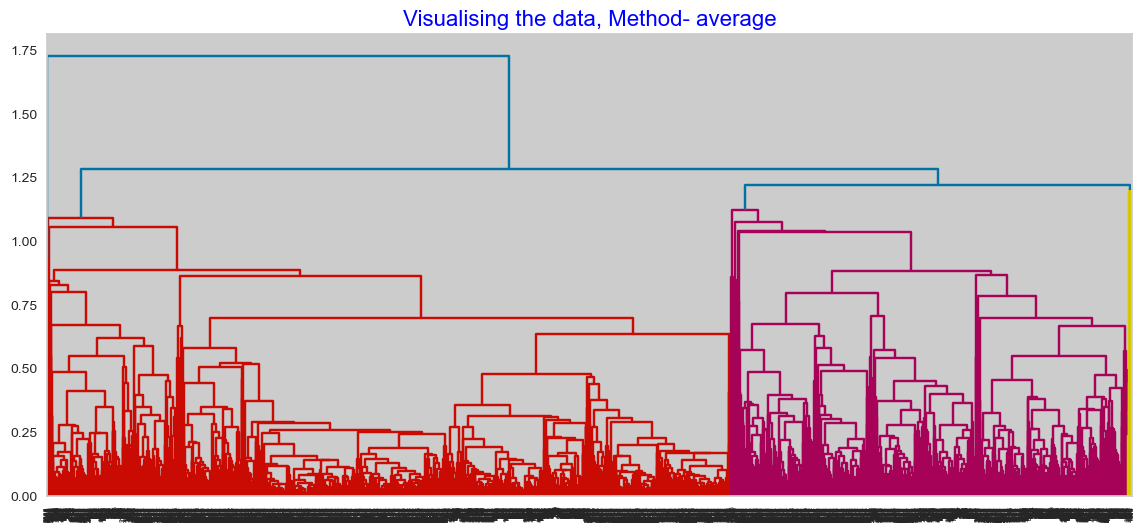

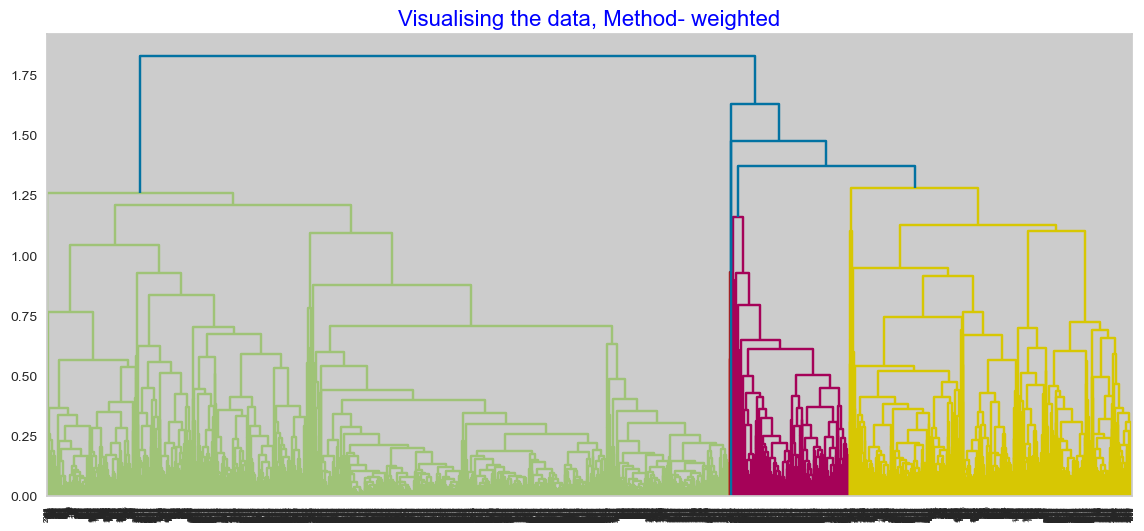

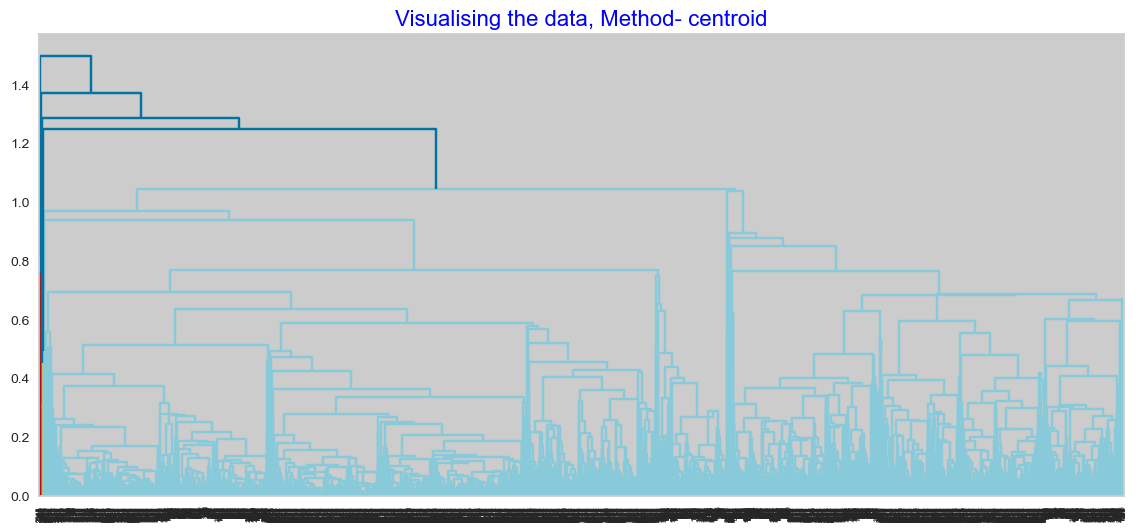

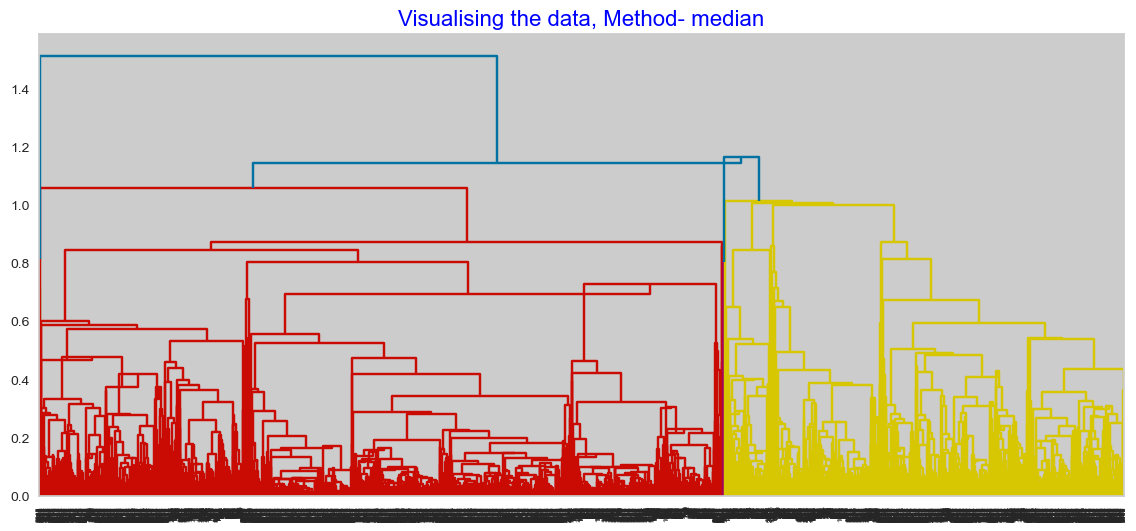

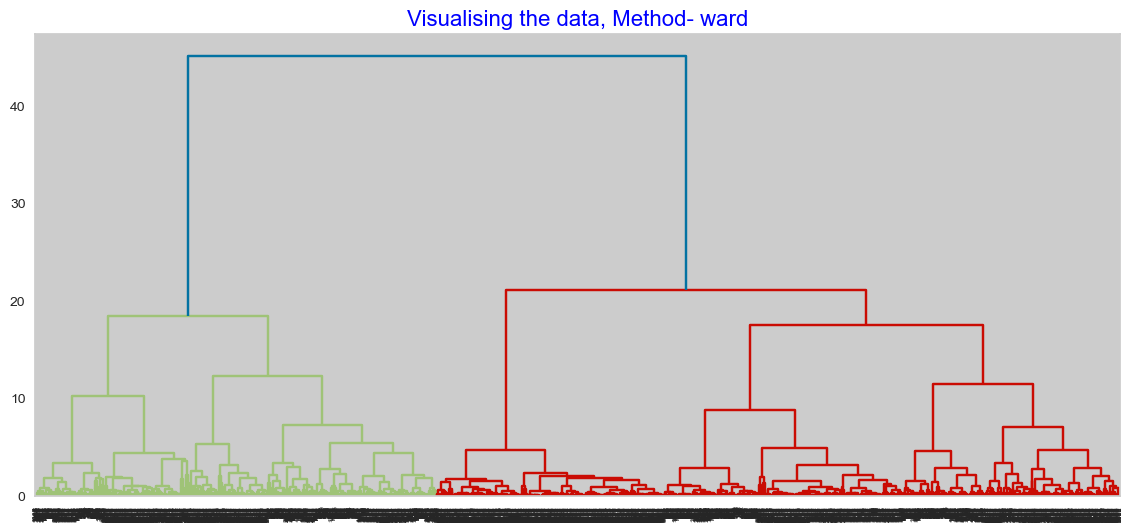

In [60]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))    
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_airline, method = methods,optimal_ordering=False))

In [62]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters_list = [2, 3, 4, 5, 6, 7, 8]  # always start number from 2.

for n_clusters in n_clusters_list:
    for linkage in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_airline)
        silhouette_score1 = silhouette_score(norm_airline, hie_labels1)
        print("For n_clusters =", n_clusters, "The average silhouette_score with linkage-", linkage, ':', silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4701970394742716
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.46765873557390897
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4356499222984323
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4701970394742716

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3434542103874939
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4658447823503042
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46834199629175055
For n_clusters = 3 The average silhouette_score with linkage- single : 0.4694358885826447

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32621110074848614
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4121977176126769
For n_clusters = 4 The average silhouette_score with linkage- average : 0.43839106911894876
F

In [63]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0])

In [64]:
# Cluster numbers
agg_clustering.n_clusters_

2

In [65]:
# Clustering Score
(silhouette_score(norm_airline, agg_clustering.labels_)*100).round(3)

47.02

In [66]:
# Concating Labels with main dataset copy
airline_df['Hierarchical_Labels'] = agg_clustering.labels_

In [67]:
airline_df.groupby('Hierarchical_Labels').agg(['mean'])


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.805798
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.567184


In [68]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_airline, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


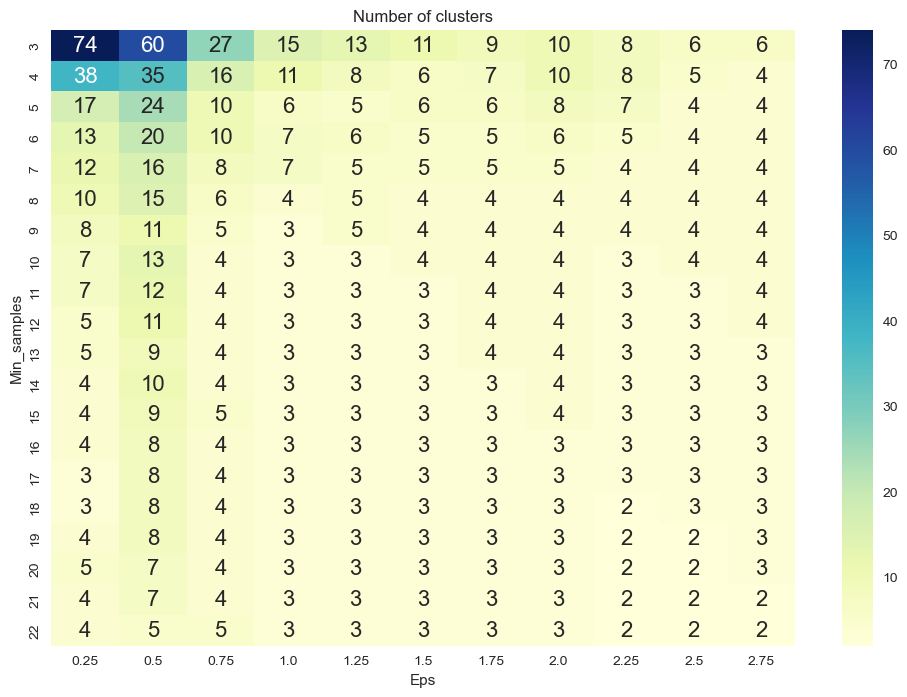

In [72]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

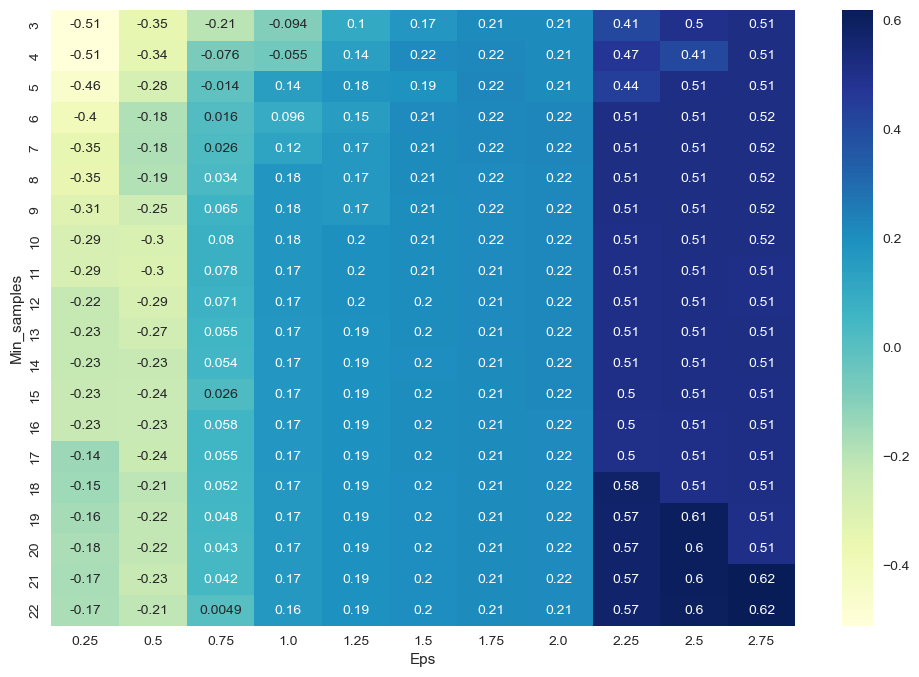

In [73]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [75]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.75 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6192


In [76]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_airline)

DBSCAN(eps=2.5, min_samples=21)

In [77]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,0


In [78]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
-1,1717.255708,209141.000000,1508.424658,2.479452,1.26484,1.223744,44253.849315,24.447489,3323.054795,9.566210,4740.178082,0.675799,3.164384,0.675799
0,2032.059259,65748.632275,65.071164,2.035185,1.00000,1.000000,15574.245238,10.857672,294.183598,0.898942,4082.544974,0.352646,0.967460,0.352646


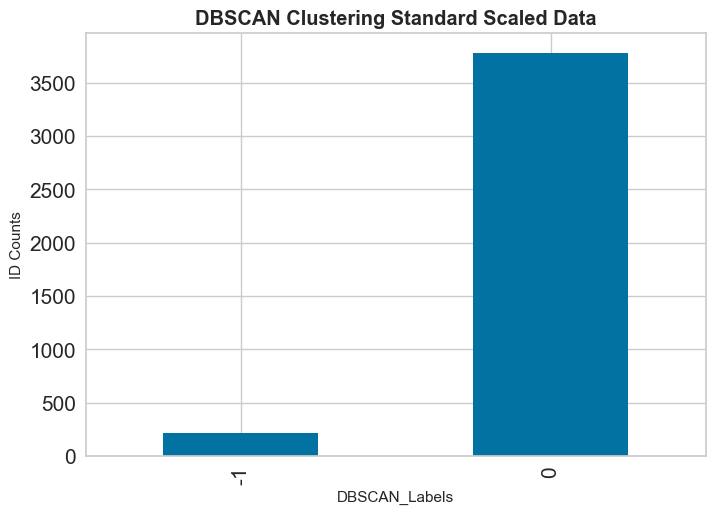

In [79]:
airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [80]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [81]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_airline, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


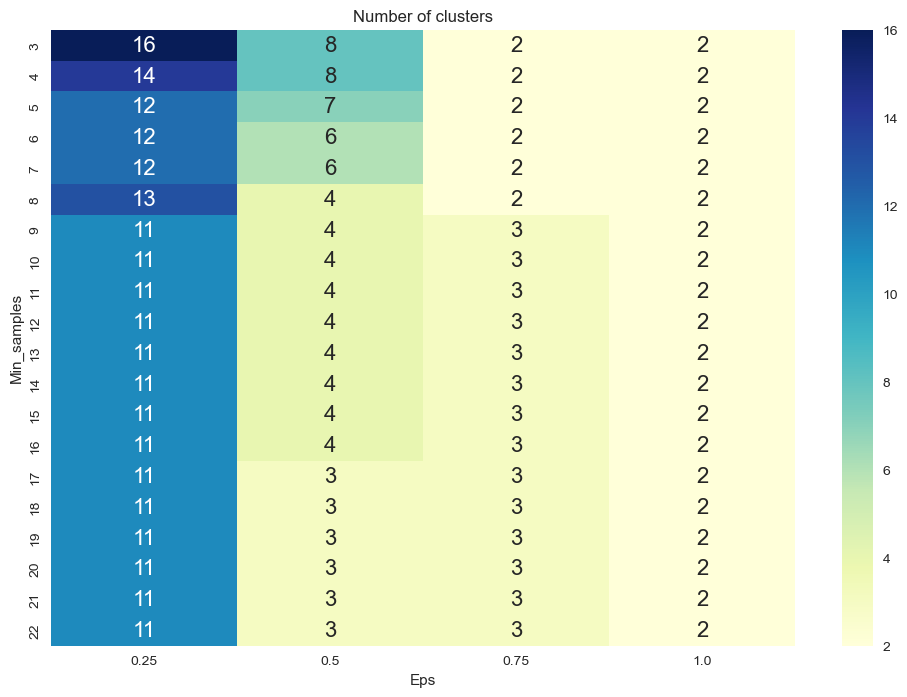

In [82]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

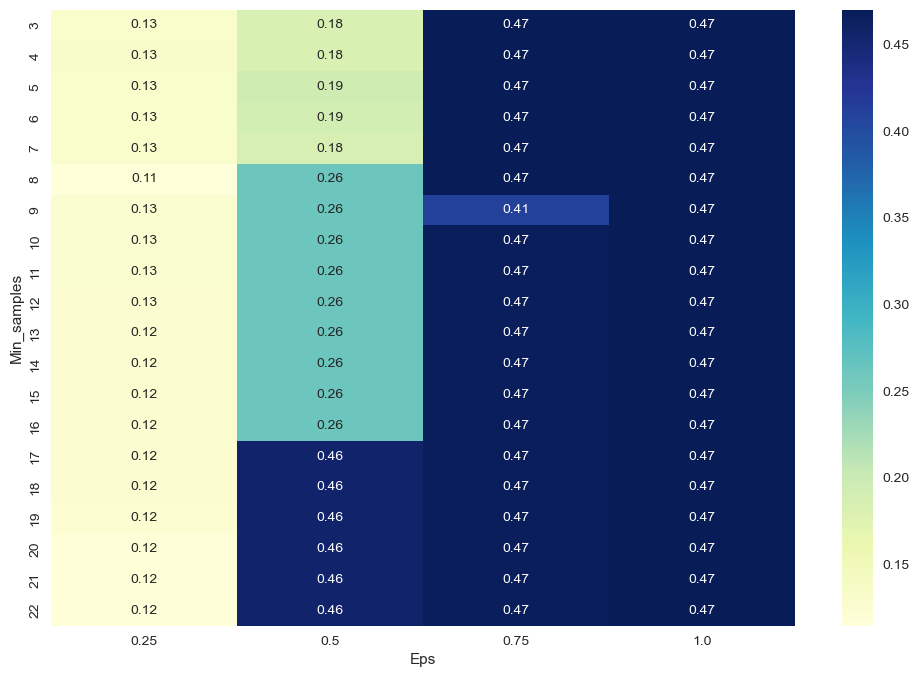

In [83]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [84]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.4702


In [85]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.4702


In [86]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(norm_airline)

DBSCAN(eps=1, min_samples=22)

In [87]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1,1


In [88]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.805798,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.567184,1.0


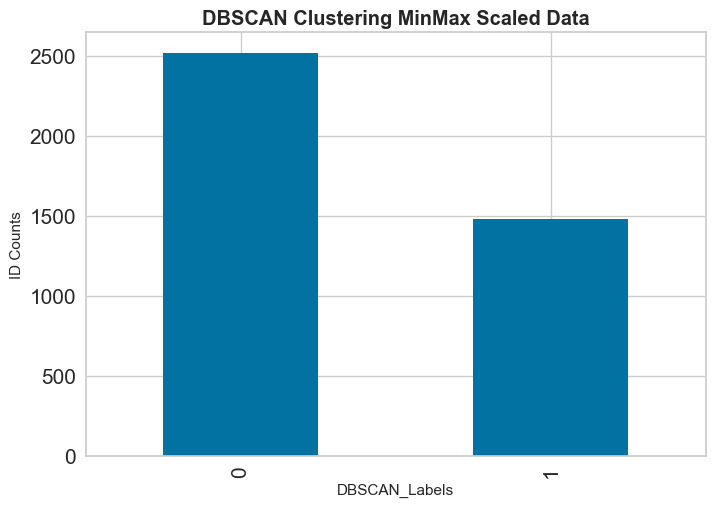

In [89]:
airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [90]:
cluster1 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline

,Cluster1_Avg,Cluster2_Avg
ID,2173.169182,1745.592843
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595
